In [66]:
!pip3 install -U spacy
!pip3 install nltk
!pip3 install circlify


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Requirement already up-to-date: spacy in /home/gritas01/.local/lib/python3.8/site-packages (3.6.0)
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_byt

In [67]:
!python3 -m spacy download es
!python3 -m spacy download en

/home/gritas01/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-07-24 13:50:44.982943: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2023-07-24 13:50:52.746942: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2023-07-24 13:50:52.761390: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-07-24 13:50:52.761419: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (spider03.utb.edu.co): /proc/driver/nvidia/version does not exist
⚠ As of spaCy v3.0, shortcuts like 'es' are deprecated. Please use the
full pipeline package name 'es_core_news_sm' instead.
/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: C

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gritas01/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
#Useless here

import os
import sys
PATH = os.getcwd()
DIR_DATA = PATH + '{0}data{0}'.format(os.sep)
sys.path.append(PATH) if PATH not in list(sys.path) else None
DIR_DATA

'/home/gritas01/PhonesthemsV2/run/data/'

In [70]:
!pip3 install seaborn
!pip3 install plotly


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretsto

In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter

# Plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Text analysis API's
import re
import spacy
import nltk
import unicodedata
from nltk.corpus import stopwords
from nltk import TweetTokenizer
from spacy.lang.es import Spanish

# Preprocessin API´s
from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing

# Regularization API´s 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Feature extration API´s
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Machine Learning Methods 

from sklearn.linear_model import LogisticRegression

# Metrics Libraries
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

/home/gritas01/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [72]:
nlp = spacy.load('es_core_news_sm')

In [8]:
data_raw = pd.read_csv('/home/gritas01/PhonesthemsV2/data/input/Valence_train_oc_es.csv', sep=';')
data_raw.head(30)
#len(data_raw)

,ID,Tweet,Dimension,Intensity,Description
0,2018-Es-00818,Este año me tocará ir sola a la Convención de ...,valence,0,se infiere un estado emocional neutral or mixto
1,2018-Es-06065,MB si no me equivoco una vez me confundi de sn...,valence,0,se infiere un estado emocional neutral or mixto
2,2018-Es-00417,@cokep Que eres terrible fome! 🙄 Y añejo poh!,valence,-2,se infiere un estado emocional moderadamente n...
3,2018-Es-00861,Gracias por informar temas de contingencia del...,valence,-1,se infiere un estado emocional ligeramente neg...
4,2018-Es-01772,En Maipú hace falta una peluquería ATR,valence,-1,se infiere un estado emocional ligeramente neg...
5,2018-Es-01969,Datos @FPCIUDADANA y @GobiernodeChile dicen q ...,valence,-2,se infiere un estado emocional moderadamente n...
6,2018-Es-03177,"@MartinezTobias1 AAAAA feliz día loquito,te ex...",valence,2,se infiere un estado emocional moderadamente p...
7,2018-Es-05589,La gente siempre piensa que los estoy mirando ...,valence,-2,se infiere un estado emocional moderadamente n...
8,2018-Es-01809,Me sigue haciendo preguntas sobre el color de ...,valence,0,se infiere un estado emocional neutral or mixto
9,2018-Es-02723,Amo que @Apple haya hecho una actualización pa...,valence,-1,se infiere un estado emocional ligeramente neg...


In [74]:
data_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           1566 non-null   object
 1   Tweet        1566 non-null   object
 2   Dimension    1566 non-null   object
 3   Intensity    1566 non-null   int64 
 4   Description  1566 non-null   object
dtypes: int64(1), object(4)
memory usage: 61.3+ KB


In [75]:
tweet_by_polarity = data_raw.groupby("Intensity", as_index=False)['Tweet'].count()
tweet_by_polarity.head(10)

,Intensity,Tweet
0,-3,184
1,-2,286
2,-1,309
3,0,354
4,1,177
5,2,144
6,3,112


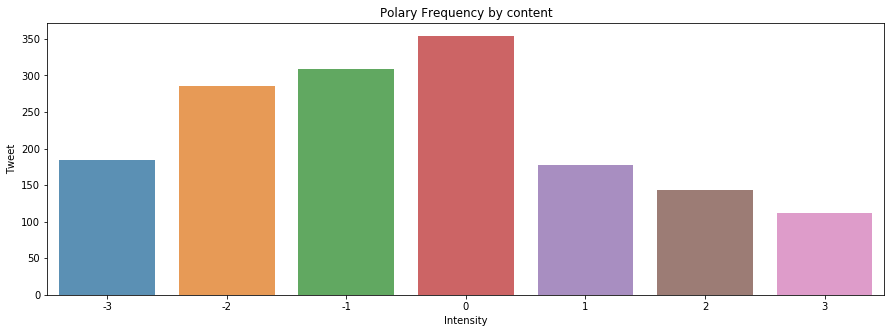

In [76]:
plt.figure(figsize=(15,5))
sns.barplot(data =tweet_by_polarity, x = "Intensity", y = "Tweet", alpha=0.8)
plt.title('Polary Frequency by content')
plt.show()

In [77]:
words = {}
for row in tqdm(data_raw['Tweet']):
    doc = nlp(row.lower())
    for token in doc:
        if token.is_alpha and not token.is_stop:
            if token.text in words:
                num_temp = int(words[token.text])
                words[token.text] = num_temp + 1
            else:
                words[token.text] = 1

100%|██████████| 1566/1566 [00:16<00:00, 97.75it/s] 


In [78]:
df_words = pd.DataFrame([[key, words[key]] for key in words.keys()], columns=['Word', 'Freq'])
df_words.sort_values('Freq')
df_words = df_words[:50]
df_words.head(20)

,Word,Freq
0,año,11
1,tocará,1
2,convención,1
3,db,1
4,vamo,1
5,otakus,1
6,mb,1
7,equivoco,1
8,confundi,1
9,snap,2


In [79]:
def get_colordict(palette,number,start):
    pal = list(sns.color_palette(palette=palette, n_colors=number).as_hex())
    color_d = dict(enumerate(pal, start=start))
    return color_d

import circlify
# compute circle positions:
circles = circlify.circlify(df_words['Freq'][0:30].tolist(), 
                            show_enclosure=False, 
                            target_enclosure=circlify.Circle(x=0, y=0)
                           )
n = df_words['Freq'][0:30].max()
color_dict = get_colordict('RdYlBu_r',n ,1)

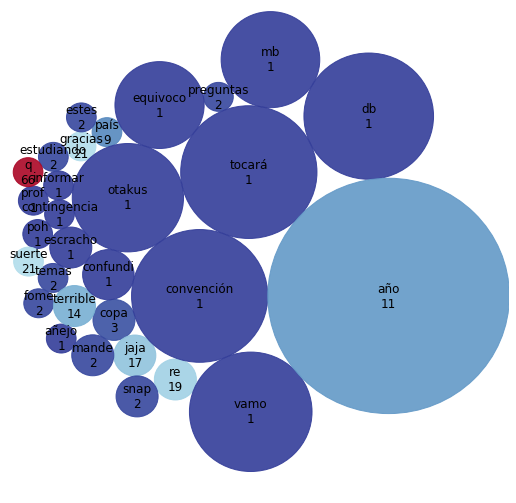

In [80]:
fig, ax = plt.subplots(figsize=(9,9), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = list(df_words['Word'][0:30])
counts = list(df_words['Freq'][0:30])
labels.reverse()
counts.reverse()

# print circles
for circle, label, count in zip(circles, labels, counts):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.9, color = color_dict.get(count)))
    plt.annotate(label +'\n'+ str(count), (x,y), size=12, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.show()

In [81]:
pos_freq = {}
for row in tqdm(data_raw['Tweet'].to_list()):
    doc = nlp(row.lower())
    for token in doc:
        if token.pos_ in pos_freq:
            value = pos_freq[token.pos_]
            pos_freq[token.pos_] = value + 1
        else:
            pos_freq[token.pos_] =  1

100%|██████████| 1566/1566 [00:14<00:00, 111.82it/s]


In [82]:
df_pos = pd.DataFrame([[key, pos_freq[key]] for key in pos_freq.keys()], columns=['POS', 'Freq'])
df_pos.sort_values('Freq').tail(15)
df_pos = df_pos[:30]
df_pos.head(15)


,POS,Freq
0,DET,2229
1,NOUN,4123
2,PRON,2141
3,VERB,3346
4,AUX,1086
5,ADJ,1923
6,ADP,2314
7,PROPN,1336
8,INTJ,78
9,SCONJ,853


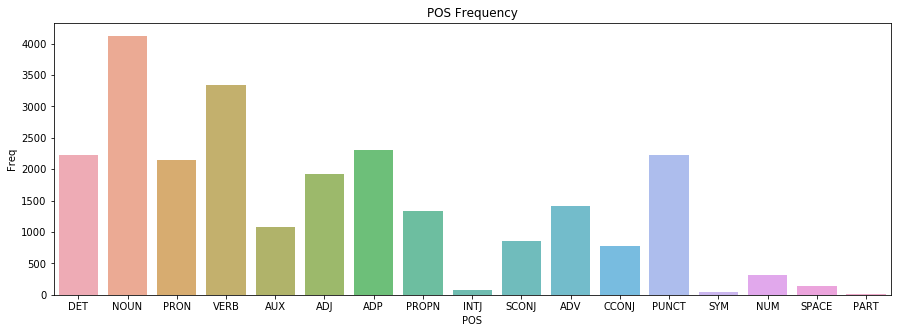

In [83]:
plt.figure(figsize=(15,5))
sns.barplot(data = df_pos, x = 'POS', y = 'Freq', alpha=0.8)
plt.title('POS Frequency')
plt.show()

# Prétraitement

In [84]:
def processing(text: str):
    result = ''
    try:
        text = unicodedata.normalize('NFD', text)
        text = text.encode('ascii', 'ignore')
        text_out = text.decode("utf-8")
        text_out = text_out.lower()
        text_out = re.sub("[\U0001f000-\U000e007f]", 'EMOJI', text_out)
        text_out = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+'
                          r'|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))',
                          'URL', text_out)
        text_out = re.sub("@([A-Za-z0-9_]{1,40})", 'MENTION', text_out)
        text_out = re.sub("#([A-Za-z0-9_]{1,40})", 'HASTAG', text_out)
        # Remove patterns
        
        text_out = re.sub(r'\©|\×|\⇔|\_|\»|\«|\~|\#|\$|\€|\Â|\�|\¬', '', text_out)
        text_out = re.sub(r'\,|\;|\:|\!|\¡|\’|\‘|\”|\“|\"|\'|\`', '', text_out)
        text_out = re.sub(r'\}|\{|\[|\]|\(|\)|\<|\>|\?|\¿|\°|\|', '', text_out)
        text_out = re.sub(r'\/|\-|\+|\*|\=|\^|\%|\&|\$', '', text_out)
        text_out = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text_out)
        text_out = re.sub(r'[0-9]', '', text_out)
        text_out = re.sub(r'\s+', ' ', text_out).strip()
        text_out = text_out.rstrip()
        result = text_out if text_out != ' ' else None
    except Exception as e:
        print('Error processing: {0}'.format(e))
    return result

In [85]:
messages = [processing(row) for row in data_raw['Tweet'].tolist()]
messages

['este ano me tocara ir sola a la convencion de db vamo a conocer otakus',
 'mb si no me equivoco una vez me confundi de snap y te mande terrible escracho mio jajame re copa q estes estudiando el prof suerte con eso',
 'MENTION que eres terrible fome y anejo poh',
 'gracias por informar temas de contingencia del pais preguntas claves para el proceso del pais. HASTAG HASTAG',
 'en maipu hace falta una peluqueria atr',
 'datos MENTION y MENTION dicen q delincuencia ha bajado sinemb sensacion d inseguridad sigue. gran trabajo d la prensa',
 'MENTION aaaaa feliz dia loquitote extranoo',
 'la gente siempre piensa que los estoy mirando mal. yo no miro mal a nadie tengo cara de amargado y ya.',
 'me sigue haciendo preguntas sobre el color de mis pies y hasta no responder todo no me va a decir el motivo de su curiosidad',
 'amo que MENTION haya hecho una actualizacion para poner lento mi iphone. lo amo de verdad. HASTAG',
 'feliz dia me dijo si habremos compartido baldes en lbbb jajajajajaajaa

In [86]:
stop_words = stopwords.words('spanish')
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [87]:
bow = CountVectorizer(analyzer='word', ngram_range=(1, 3), stop_words= stop_words)

bow.fit(messages)


CountVectorizer(ngram_range=(1, 3),
                stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                            'del', 'se', 'las', 'por', 'un', 'para', 'con',
                            'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                            'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                            'porque', ...])

In [88]:
x = bow.transform(messages).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [89]:
df = pd.DataFrame(x, index=['Tweet '+str(i) for i in range(1, 1+len(messages))])
df.round(3)

,0,1,2,3,4,5,6,7,8,9,...,21389,21390,21391,21392,21393,21394,21395,21396,21397,21398
Tweet 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tweet 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tweet 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tweet 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tweet 5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tweet 1562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tweet 1563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tweet 1564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tweet 1565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
y = data_raw['Intensity']
y

0       0
1       0
2      -2
3      -1
4      -1
       ..
1561   -1
1562    0
1563   -1
1564    1
1565   -3
Name: Intensity, Length: 1566, dtype: int64

In [91]:
Counter(y)

Counter({0: 354, -2: 286, -1: 309, 2: 144, 1: 177, 3: 112, -3: 184})

In [92]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)
Counter(y)

Counter({0: 354, -2: 354, -1: 354, 2: 354, 1: 354, 3: 354, -3: 354})

# Train & Test

# Méthode 1: en séparant les données en deux parties

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=42)
softmax = LogisticRegression(multi_class="multinomial", solver="lbfgs")
softmax.fit(x_train, y_train)


LogisticRegression(multi_class='multinomial')

In [94]:
y_predict = softmax.predict(x_test)
y_predict

array([ 3, -3,  3,  0,  1,  3,  3, -2, -3, -1,  2,  2, -3, -1,  2,  3, -3,
       -1,  2,  3,  1,  3,  1,  3,  3,  1,  3, -2,  2,  0,  3,  2, -2, -1,
        3,  0,  3,  1,  3,  2,  0,  0,  3,  0, -3,  3, -3,  1,  0,  0,  3,
       -2,  2,  3,  2,  1,  3, -1,  2,  3,  2,  2, -2, -3,  2,  3,  3, -3,
       -3,  3, -3, -1,  2,  1,  3,  2,  3, -3,  2,  1,  3,  3,  3, -1,  1,
       -2,  0,  2,  2,  1,  1,  2, -2, -1,  2,  2, -1,  1,  3, -3,  0,  3,
        3,  3, -1,  3,  1,  0,  0,  0,  3,  1, -2,  3,  1, -3,  2,  2, -3,
        3,  3,  3, -1,  2,  3, -3,  1, -1, -1,  3,  3,  3,  2,  3, -1,  3,
       -2,  2,  3, -3,  2,  3,  3,  2,  3,  2,  0,  0,  3,  2,  3,  3,  1,
        1,  3,  0,  0, -3,  3,  2, -2,  0,  2,  3,  1,  3,  3,  3,  2,  3,
        3,  3,  2,  2,  3, -2,  0,  2,  3, -2,  0,  0,  3,  2,  2,  3,  3,
        2,  3,  3, -3,  3,  2,  0,  2,  1,  3,  3,  1,  2,  2,  3,  2,  2,
        3, -3, -2,  2,  2,  2,  3, -3,  2, -2, -2,  3,  3,  3, -3, -3,  2,
        2, -3,  0,  3,  2

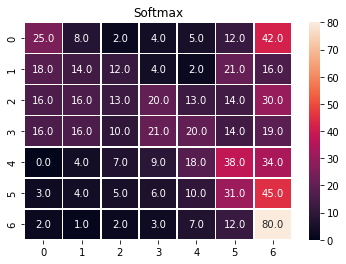

In [95]:
cm = confusion_matrix(y_test, y_predict)
plt.figure()
sns.heatmap(cm , annot =True, linewidth=0.8,fmt=".1f")
plt.title("Softmax")
plt.show()

In [96]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

          -3       0.31      0.26      0.28        98
          -2       0.22      0.16      0.19        87
          -1       0.25      0.11      0.15       122
           0       0.31      0.18      0.23       116
           1       0.24      0.16      0.19       110
           2       0.22      0.30      0.25       104
           3       0.30      0.75      0.43       107

    accuracy                           0.27       744
   macro avg       0.27      0.27      0.25       744
weighted avg       0.27      0.27      0.24       744



In [113]:
f1 = f1_score(y_test, y_predict, average="macro")
precision = precision_score(y_test, y_predict, average="macro")
recall = recall_score(y_test, y_predict, average="macro")
accuracy = accuracy_score(y_test, y_predict, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

F1:  0.24613489937797198
Precision:  0.266016965383087
Recall:  0.27328432556702403
Accuracy:  0.271505376344086


# Méthode 2: avec  Valence_test_oc_es

In [150]:
data_raw_test = pd.read_csv('/home/gritas01/PhonesthemsV2/data/input/Valence_test_oc_es.csv', sep=';')
messages2 = [processing(row) for row in data_raw_test['Tweet'].tolist()]

x_test2 = bow.transform(messages2).toarray()
y_test2 = data_raw_test['Intensity']

oversample = SMOTE()
x_test2, y_test2 = oversample.fit_resample(x_test2, y_test2)


In [151]:
#(1) Methode simple 
softmax.fit(x, y)
#y_predict2 = softmax.predict(x_test2)

LogisticRegression(multi_class='multinomial')

In [152]:
y_predict2 = cross_val_predict(softmax, x, y, cv=5)

In [156]:
#(2) Cross valiation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

scores = cross_val_score(softmax, x_test2, y_test2, cv=5)
#y_predict2 = cross_val_predict(softmax, x, y, cv=5)

In [157]:
scores

array([0.17647059, 0.20895522, 0.23880597, 0.2238806 , 0.25373134])

In [154]:
y_predict2

array([-3,  0,  1, ...,  1,  3,  3])

In [155]:
cm2 = confusion_matrix(y_test2, y_predict2)
plt.figure()
sns.heatmap(cm2 , annot =True, linewidth=0.8,fmt=".1f")
plt.title("Softmax")
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [336, 2478]

In [ ]:
print(classification_report(y_test2, y_predict2))

In [ ]:
f1 = f1_score(y_test2, y_predict2, average="macro")
precision = precision_score(y_test2, y_predict2, average="macro")
recall = recall_score(y_test2, y_predict2, average="macro")
accuracy = accuracy_score(y_test2, y_predict2, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)